In [3]:
# inspect dataset

In [2]:
!pip install geopandas
!pip install shapely

In [4]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from shapely.validation import make_valid
import numpy as np
import matplotlib.pyplot as plt

### Inspecting Allegheny County census tract file for future validation purposes. 

Data taken from WPRDC should show all Census Tracts in year 2016. Result: there should be 402 rows in our final data set. 

In [6]:
alCoCTs = pd.read_csv('AlleghenyCountyCensusTracts2016.csv')
print('Number of Census Tracts: ', len(alCoCTs))
alCoCTs.sort_values('geoid')

Number of Census Tracts:  402


,_id,fid,state_fp,county_fp,tract_ce,affgeoid,geoid,name,lsad,a_land,a_water,shape_length,shape_area
69,15019,70,42,3,10300,1400000US42003010300,42003010300,103.0,CT,866087,235982,0.055235,0.000117
368,15318,369,42,3,20100,1400000US42003020100,42003020100,201.0,CT,1678102,483177,0.083161,0.000231
28,14978,29,42,3,20300,1400000US42003020300,42003020300,203.0,CT,1594790,326537,0.077032,0.000204
70,15020,71,42,3,30500,1400000US42003030500,42003030500,305.0,CT,668309,0,0.046956,0.000072
394,15344,395,42,3,40200,1400000US42003040200,42003040200,402.0,CT,604717,0,0.049916,0.000064
...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,15162,213,42,3,981000,1400000US42003981000,42003981000,9810.0,CT,1372534,0,0.063284,0.000147
80,15030,81,42,3,981100,1400000US42003981100,42003981100,9811.0,CT,875989,0,0.043523,0.000093
68,15018,69,42,3,981200,1400000US42003981200,42003981200,9812.0,CT,460275,156913,0.037880,0.000067
165,15115,166,42,3,981800,1400000US42003981800,42003981800,9818.0,CT,1822889,310071,0.066922,0.000228


In [7]:
cond_prevn = pd.read_csv("500_Cities__Census_Tract-level_Data__GIS_Friendly_Format___2019_release_20250405.csv")
cond_prevn = cond_prevn.rename(columns={'TractFIPS': 'Geo_FIPS'})
#Removing unrelated prevalence columns (not comorbidities with Asthma)
def drop_columns_with_keyword(df, keyword):
    # Identify columns containing the keyword (95CI)
    cols_to_drop = [col for col in df.columns if keyword.lower() in col.lower()]
    # Drop them and return the updated DataFrame
    return df.drop(columns=cols_to_drop)
cond_prevn = drop_columns_with_keyword(cond_prevn,'95CI')
cond_prevn = cond_prevn.drop([
    'ARTHRITIS_CrudePrev',
    'BINGE_CrudePrev',
    'CANCER_CrudePrev',
    'COLON_SCREEN_CrudePrev',
    'DENTAL_CrudePrev',
    'KIDNEY_CrudePrev',
    'LPA_CrudePrev',
    'MAMMOUSE_CrudePrev',
    'MHLTH_CrudePrev',
    'PAPTEST_CrudePrev',
    'PHLTH_CrudePrev',
    'SLEEP_CrudePrev',
    'STROKE_CrudePrev',
    'TEETHLOST_CrudePrev'], axis=1)
cond_prevn['lat'] = cond_prevn['Geolocation'].str[1:15]
cond_prevn['lon'] = cond_prevn['Geolocation'].str[-15:-1]
cond_prevn

,StateAbbr,PlaceName,PlaceFIPS,Geo_FIPS,Place_TractID,Population2010,ACCESS2_CrudePrev,BPHIGH_CrudePrev,BPMED_CrudePrev,CASTHMA_CrudePrev,...,COPD_CrudePrev,COREM_CrudePrev,COREW_CrudePrev,CSMOKING_CrudePrev,DIABETES_CrudePrev,HIGHCHOL_CrudePrev,OBESITY_CrudePrev,Geolocation,lat,lon
0,PA,Allentown,4202000,42077000101,4202000-42077000101,3661,12.4,28.6,74.2,10.0,...,6.3,38.6,33.1,21.1,9.9,30.7,33.4,"(40.62928770640, -75.4306548629)",40.62928770640,-75.4306548629
1,PA,Allentown,4202000,42077000102,4202000-42077000102,4150,14.8,33.1,76.5,10.7,...,8.6,33.9,28.1,24.9,12.7,34.2,37.2,"(40.62310078700, -75.4455884082)",40.62310078700,-75.4455884082
2,PA,Allentown,4202000,42077000400,4202000-42077000400,3548,20.5,31.4,73.4,11.3,...,8.9,30.0,25.3,28.0,12.9,32.6,39.6,"(40.61686565200, -75.4614158392)",40.61686565200,-75.4614158392
3,PA,Allentown,4202000,42077000500,4202000-42077000500,2646,25.5,32.8,72.0,11.0,...,8.1,24.2,20.9,29.1,15.7,32.4,45.0,"(40.60540785140, -75.4582342428)",40.60540785140,-75.4582342428
4,PA,Allentown,4202000,42077000600,4202000-42077000600,6243,17.8,31.3,74.4,10.5,...,7.9,33.3,28.3,25.1,12.4,32.6,38.5,"(40.59240545150, -75.4494513428)",40.59240545150,-75.4494513428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626,PA,Scranton,4269000,42069102700,4269000-42069102700,2747,10.5,31.6,75.7,10.2,...,7.7,39.6,32.9,23.5,9.8,34.2,32.0,"(41.39375309740, -75.6565294528)",41.39375309740,-75.6565294528
627,PA,Scranton,4269000,42069102800,4269000-42069102800,3060,7.6,36.5,80.8,9.5,...,7.9,44.1,36.3,18.5,11.1,38.0,30.7,"(41.36516563930, -75.6493931804)",41.36516563930,-75.6493931804
628,PA,Scranton,4269000,42069102900,4269000-42069102900,4160,15.3,36.9,77.9,11.3,...,10.7,31.9,23.5,27.1,13.5,36.7,38.5,"(41.38146756020, -75.6741915785)",41.38146756020,-75.6741915785
629,PA,Scranton,4269000,42069103000,4269000-42069103000,2141,13.4,33.9,76.3,10.5,...,8.7,36.4,29.6,24.8,11.6,35.5,34.9,"(41.38873828210, -75.6808207737)",41.38873828210,-75.6808207737


In [8]:
cond_prevn.shape
cond_prevn.isna().sum()

StateAbbr               0
PlaceName               0
PlaceFIPS               0
Geo_FIPS                0
Place_TractID           0
Population2010          0
ACCESS2_CrudePrev       0
BPHIGH_CrudePrev        0
BPMED_CrudePrev         0
CASTHMA_CrudePrev       0
CHD_CrudePrev           0
CHECKUP_CrudePrev       0
CHOLSCREEN_CrudePrev    0
COPD_CrudePrev          0
COREM_CrudePrev         1
COREW_CrudePrev         3
CSMOKING_CrudePrev      0
DIABETES_CrudePrev      0
HIGHCHOL_CrudePrev      0
OBESITY_CrudePrev       0
Geolocation             0
lat                     0
lon                     0
dtype: int64

### Issue: There are 275 Allegheny Cenus Tracts that are not in CDC prevelance data

Dropping all non City of Pittsburgh CTs would leave us with 125 rows

In [10]:
testMerge = alCoCTs.merge(cond_prevn, how='left', left_on='geoid', right_on='Geo_FIPS')
testMerge.isna().sum()

_id                       0
fid                       0
state_fp                  0
county_fp                 0
tract_ce                  0
affgeoid                  0
geoid                     0
name                      0
lsad                      0
a_land                    0
a_water                   0
shape_length              0
shape_area                0
StateAbbr               275
PlaceName               275
PlaceFIPS               275
Geo_FIPS                275
Place_TractID           275
Population2010          275
ACCESS2_CrudePrev       275
BPHIGH_CrudePrev        275
BPMED_CrudePrev         275
CASTHMA_CrudePrev       275
CHD_CrudePrev           275
CHECKUP_CrudePrev       275
CHOLSCREEN_CrudePrev    275
COPD_CrudePrev          275
COREM_CrudePrev         275
COREW_CrudePrev         277
CSMOKING_CrudePrev      275
DIABETES_CrudePrev      275
HIGHCHOL_CrudePrev      275
OBESITY_CrudePrev       275
Geolocation             275
lat                     275
lon                 

In [16]:
prevelence_data = cond_prevn[cond_prevn['PlaceName'] == 'Pittsburgh']
print(prevelence_data.isna().sum())
prevelence_data = prevelence_data.drop(columns=["COREW_CrudePrev"])
print('\nDropping Column with NAs\n')
print(prevelence_data.isna().sum())
prevelence_data

StateAbbr               0
PlaceName               0
PlaceFIPS               0
Geo_FIPS                0
Place_TractID           0
Population2010          0
ACCESS2_CrudePrev       0
BPHIGH_CrudePrev        0
BPMED_CrudePrev         0
CASTHMA_CrudePrev       0
CHD_CrudePrev           0
CHECKUP_CrudePrev       0
CHOLSCREEN_CrudePrev    0
COPD_CrudePrev          0
COREM_CrudePrev         0
COREW_CrudePrev         2
CSMOKING_CrudePrev      0
DIABETES_CrudePrev      0
HIGHCHOL_CrudePrev      0
OBESITY_CrudePrev       0
Geolocation             0
lat                     0
lon                     0
dtype: int64

Dropping Column with NAs

StateAbbr               0
PlaceName               0
PlaceFIPS               0
Geo_FIPS                0
Place_TractID           0
Population2010          0
ACCESS2_CrudePrev       0
BPHIGH_CrudePrev        0
BPMED_CrudePrev         0
CASTHMA_CrudePrev       0
CHD_CrudePrev           0
CHECKUP_CrudePrev       0
CHOLSCREEN_CrudePrev    0
COPD_CrudePrev          

,StateAbbr,PlaceName,PlaceFIPS,Geo_FIPS,Place_TractID,Population2010,ACCESS2_CrudePrev,BPHIGH_CrudePrev,BPMED_CrudePrev,CASTHMA_CrudePrev,...,CHOLSCREEN_CrudePrev,COPD_CrudePrev,COREM_CrudePrev,CSMOKING_CrudePrev,DIABETES_CrudePrev,HIGHCHOL_CrudePrev,OBESITY_CrudePrev,Geolocation,lat,lon
450,PA,Pittsburgh,4261000,42003010300,4261000-42003010300,6600,12.9,19.0,51.9,11.1,...,58.1,4.4,38.8,26.5,5.0,17.6,29.8,"(40.43572601140, -79.9851241394)",40.43572601140,-79.9851241394
451,PA,Pittsburgh,4261000,42003020100,4261000-42003020100,3629,6.7,22.1,71.8,9.3,...,73.4,3.8,50.2,14.4,6.4,24.9,23.4,"(40.44068353060, -80.0000351595)",40.44068353060,-80.0000351595
452,PA,Pittsburgh,4261000,42003020300,4261000-42003020300,616,4.8,19.7,67.6,8.2,...,80.4,2.8,54.3,12.3,4.9,24.2,23.4,"(40.45425423370, -79.9814998549)",40.45425423370,-79.9814998549
453,PA,Pittsburgh,4261000,42003030500,4261000-42003030500,2256,14.4,48.3,84.3,12.8,...,79.7,10.6,32.5,26.9,20.5,37.2,42.6,"(40.44273346300, -79.9837719110)",40.44273346300,-79.9837719110
454,PA,Pittsburgh,4261000,42003040200,4261000-42003040200,2604,11.8,23.3,67.1,11.7,...,61.4,5.5,31.8,22.3,8.0,22.3,29.3,"(40.44011022030, -79.9663476233)",40.44011022030,-79.9663476233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,PA,Pittsburgh,4261000,42003563200,4261000-42003563200,2439,10.2,33.1,76.5,10.0,...,78.2,7.2,43.2,23.4,11.0,32.7,33.2,"(40.45292913280, -79.9979302476)",40.45292913280,-79.9979302476
573,PA,Pittsburgh,4261000,42003980000,4261000-42003980000,540,6.7,25.6,73.9,8.5,...,81.0,4.7,51.5,16.8,7.5,29.9,25.0,"(40.48825403280, -79.8924052803)",40.48825403280,-79.8924052803
574,PA,Pittsburgh,4261000,42003980900,4261000-42003980900,1797,18.8,29.7,59.1,8.6,...,67.6,5.6,37.5,37.1,8.3,25.0,39.1,"(40.46654148170, -80.0419472659)",40.46654148170,-80.0419472659
575,PA,Pittsburgh,4261000,42003981800,4261000-42003981800,461,12.1,45.8,85.0,9.2,...,75.5,10.6,34.8,16.3,17.4,39.9,29.0,"(40.48038259110, -79.8972205116)",40.48038259110,-79.8972205116


In [18]:
testMerge.dropna().shape


(125, 36)

### Utlization Data

Kinda did some sketchy stuff to join this. Pretty much summing treats NAs as 0. Missing 6 Census Tracts for some reason.

In [21]:
ER_use = pd.read_csv("Allegheny_county_ER_use.csv")
ER_use = ER_use[ER_use['YearOfStartDate'] == 2016]
ER_use.head()

,_id,Geo_FIPS,StateFIPS,CountyFIPS,TractFIPS,BlockgroupFIPS,TotalPopEst2015_19ACS,YearOfStartDate,UnderAge1PopEst2015_19ACS,Age0to17PopEst2015_19ACS,...,ED_VisitsPer100Age0to17,NumberLowAcuityED_VisitsAge0to17,LowAcuityED_VisitsPer100Age0to17,NumberAsthmaRelatedED_Visits,AsthmaRelatedED_VisitsPer100Age0to17,NumberED_VisitsByChildrenUnder1YearOld,NumberOfInjuryRelatedVisits,InjuryRelatedEDVisitsPer100Age0to17,NumberAcuteRespiratoryTractInfectionRelatedED_VisitsAge0to17,AcuteRespiratoryTractInfectionRelatedED_VisitsPer100Age0to17
0,1,420031301002,42,3,130100,2,518,2016.0,9.4,207,...,58.9,62.0,30.0,40.0,19.3,14.0,1.0,0.5,18.0,8.7
4,5,420031301003,42,3,130100,3,489,2016.0,0.0,134,...,53.0,39.0,29.1,13.0,9.7,12.0,2.0,1.5,10.0,7.5
8,9,420031302001,42,3,130200,1,307,2016.0,0.0,49,...,202.0,41.0,83.7,45.0,91.8,9.0,NaN,0.0,24.0,49.0
12,13,420031302002,42,3,130200,2,1115,2016.0,28.2,317,...,27.8,40.0,12.6,20.0,6.3,12.0,3.0,0.9,18.0,5.7
16,17,420031303001,42,3,130300,1,358,2016.0,5.2,99,...,86.9,51.0,51.5,19.0,19.2,15.0,1.0,1.0,23.0,23.2


In [23]:
ER_use.shape

(1091, 23)

In [25]:
PC_use = pd.read_csv("Allegheny_county_PC_use.csv")
PC_use = PC_use[PC_use['YearOfContactDate'] == 2016]
PC_use.head()

,_id,Geo_FIPS,StateFIPS,CountyFIPS,TractFIPS,BlockgroupFIPS,TotalPopEst2015_19ACS,Age0to17PopEst2015_19ACS,YearOfContactDate,AllPrimaryCarePatientsAge0to17,WellChildVisitsInPastYearAge0to17,WellChildVisitsInPastYearPer100PrimaryCarePatients,AsthmaDiagnosisAge0to17,AsthmaDiagnosisPer100PrimaryCarePatientsAge0to17
0,1,420031301002,42,3,130100,2,518,207,2016,82,59,72.0,17.0,20.7
4,5,420031301003,42,3,130100,3,489,134,2016,53,34,64.2,18.0,34.0
8,9,420031302001,42,3,130200,1,307,49,2016,60,44,73.3,15.0,25.0
12,13,420031302002,42,3,130200,2,1115,317,2016,48,40,83.3,12.0,25.0
16,17,420031303001,42,3,130300,1,358,99,2016,49,31,63.3,7.0,14.3


In [27]:
PC_use.shape

(1091, 14)

In [29]:
#merging utilization data for Asthma ER and primary care
util_data = PC_use.merge(ER_use, how = 'left', left_on = 'Geo_FIPS', right_on = 'Geo_FIPS')
#dropping repeat columns
util_data = util_data.drop(["_id_y","StateFIPS_y","CountyFIPS_y","TractFIPS_y","BlockgroupFIPS_y",
                            "TotalPopEst2015_19ACS_y","Age0to17PopEst2015_19ACS_y","YearOfContactDate"],axis="columns")
#Joining rows based on CTs
#Dropping Per100 columns
util_data = drop_columns_with_keyword(util_data,'Per100')
util_data['Geo_FIPS'] = util_data['Geo_FIPS'].apply(str)
util_data['Geo_FIPS'] = util_data['Geo_FIPS'].str[:-1]
util_data = util_data.drop(columns=['_id_x', 'StateFIPS_x', 'CountyFIPS_x', 'TractFIPS_x', 'BlockgroupFIPS_x'])
util_data = util_data.groupby('Geo_FIPS').sum()
util_data.isna().sum()

TotalPopEst2015_19ACS_x                                         0
Age0to17PopEst2015_19ACS_x                                      0
AllPrimaryCarePatientsAge0to17                                  0
WellChildVisitsInPastYearAge0to17                               0
AsthmaDiagnosisAge0to17                                         0
YearOfStartDate                                                 0
UnderAge1PopEst2015_19ACS                                       0
Unique0to17WithED_Visit                                         0
NumberED_VisitsAge0to17                                         0
NumberLowAcuityED_VisitsAge0to17                                0
NumberAsthmaRelatedED_Visits                                    0
NumberED_VisitsByChildrenUnder1YearOld                          0
NumberOfInjuryRelatedVisits                                     0
NumberAcuteRespiratoryTractInfectionRelatedED_VisitsAge0to17    0
dtype: int64

In [31]:
util_data

,TotalPopEst2015_19ACS_x,Age0to17PopEst2015_19ACS_x,AllPrimaryCarePatientsAge0to17,WellChildVisitsInPastYearAge0to17,AsthmaDiagnosisAge0to17,YearOfStartDate,UnderAge1PopEst2015_19ACS,Unique0to17WithED_Visit,NumberED_VisitsAge0to17,NumberLowAcuityED_VisitsAge0to17,NumberAsthmaRelatedED_Visits,NumberED_VisitsByChildrenUnder1YearOld,NumberOfInjuryRelatedVisits,NumberAcuteRespiratoryTractInfectionRelatedED_VisitsAge0to17
Geo_FIPS,,,,,,,,,,,,,,
42003010300,4147,155,50,33,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42003020100,5490,201,71,44,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42003020300,1212,41,28,22,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42003030500,2109,381,272,193,49.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42003040200,1576,100,81,49,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42003980500,16,0,4,3,1.0,2016.0,0.0,3.0,4.0,1.0,0.0,1.0,1.0,1.0
42003981000,0,0,12,10,3.0,2016.0,0.0,12.0,36.0,26.0,14.0,5.0,1.0,7.0
42003981200,0,0,2,2,0.0,2016.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


### Race Data

In [35]:
#loading racial data from 2010 census
Race_data = pd.read_csv("2010_census_race_P9-Data.csv", header = 1)
#removing extra details on multi-racial individuals
Race_data = Race_data.iloc[:,:13]
Race_data['Type'] = Race_data['Geographic Area Name'].apply(lambda x : ' '.join(x.split(' ')[:2]))
Race_data = Race_data[Race_data['Type'] == 'Census Tract']
Race_data

,Geography,Geographic Area Name,Total,Total!!Hispanic or Latino,Total!!Not Hispanic or Latino,Total!!Not Hispanic or Latino!!Population of one race,Total!!Not Hispanic or Latino!!Population of one race!!White alone,Total!!Not Hispanic or Latino!!Population of one race!!Black or African American alone,Total!!Not Hispanic or Latino!!Population of one race!!American Indian and Alaska Native alone,Total!!Not Hispanic or Latino!!Population of one race!!Asian alone,Total!!Not Hispanic or Latino!!Population of one race!!Native Hawaiian and Other Pacific Islander alone,Total!!Not Hispanic or Latino!!Population of one race!!Some Other Race alone,Total!!Not Hispanic or Latino!!Two or More Races,Type
1,1400000US42003010300,"Census Tract 103, Allegheny County, Pennsylvania",6600,161,6439,6362,4260,2004,12,72,2,12,77,Census Tract
2,1400000US42003020100,"Census Tract 201, Allegheny County, Pennsylvania",3629,119,3510,3422,2642,573,8,171,1,27,88,Census Tract
3,1400000US42003020300,"Census Tract 203, Allegheny County, Pennsylvania",616,10,606,595,459,96,1,39,0,0,11,Census Tract
4,1400000US42003030500,"Census Tract 305, Allegheny County, Pennsylvania",2256,32,2224,2179,298,1846,7,24,0,4,45,Census Tract
5,1400000US42003040200,"Census Tract 402, Allegheny County, Pennsylvania",2604,61,2543,2505,1331,997,7,169,0,1,38,Census Tract
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,1400000US42003981000,"Census Tract 9810, Allegheny County, Pennsylvania",4,0,4,4,4,0,0,0,0,0,0,Census Tract
399,1400000US42003981100,"Census Tract 9811, Allegheny County, Pennsylvania",7,0,7,7,6,1,0,0,0,0,0,Census Tract
400,1400000US42003981200,"Census Tract 9812, Allegheny County, Pennsylvania",0,0,0,0,0,0,0,0,0,0,0,Census Tract
401,1400000US42003981800,"Census Tract 9818, Allegheny County, Pennsylvania",461,14,447,436,257,174,3,2,0,0,11,Census Tract


In [37]:
Race_data.shape

(402, 14)

### House Hold Income Data

In [40]:
#loading 5 year HH income data adj to 2016 inflation levels
HHincome_data = pd.read_csv("2016_ad_HHincome.S2503-Data.csv", na_values = ['-'])
#removed data on Housing cost as % of hh income
#HHincome_data = HHincome_data.iloc[:,:-133]
HHincome_data['Type'] = HHincome_data['Geographic Area Name'].apply(lambda x : ' '.join(x.split(' ')[:2]))
HHincome_data = HHincome_data[HHincome_data['Type'] == 'Census Tract']
HHincome_data

,Geography,Geographic Area Name,Occupied housing units!!Estimate!!Occupied housing units,Occupied housing units!!Margin of Error!!Occupied housing units,Owner-occupied housing units!!Estimate!!Occupied housing units,Owner-occupied housing units!!Margin of Error!!Occupied housing units,Renter-occupied housing units!!Estimate!!Occupied housing units,Renter-occupied housing units!!Margin of Error!!Occupied housing units,"Occupied housing units!!Estimate!!HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!Less than $5,000","Occupied housing units!!Margin of Error!!HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!Less than $5,000",...,Owner-occupied housing units!!Margin of Error!!MONTHLY HOUSING COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS!!Zero or negative income,Renter-occupied housing units!!Estimate!!MONTHLY HOUSING COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS!!Zero or negative income,Renter-occupied housing units!!Margin of Error!!MONTHLY HOUSING COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS!!Zero or negative income,Occupied housing units!!Estimate!!MONTHLY HOUSING COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS!!No cash rent,Occupied housing units!!Margin of Error!!MONTHLY HOUSING COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS!!No cash rent,Owner-occupied housing units!!Estimate!!MONTHLY HOUSING COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS!!No cash rent,Owner-occupied housing units!!Margin of Error!!MONTHLY HOUSING COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS!!No cash rent,Renter-occupied housing units!!Estimate!!MONTHLY HOUSING COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS!!No cash rent,Renter-occupied housing units!!Margin of Error!!MONTHLY HOUSING COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS!!No cash rent,Type
1,1400000US42003010300,"Census Tract 103, Allegheny County, Pennsylvania",281,38,73,31,208,44,4.6,5.1,...,26,2.9,4.3,0.0,7.7,(X),(X),0.0,10.2,Census Tract
2,1400000US42003020100,"Census Tract 201, Allegheny County, Pennsylvania",2042,160,408,116,1634,154,4.8,2.5,...,5.4,2.6,2.1,0.0,1.1,(X),(X),0.0,1.4,Census Tract
3,1400000US42003020300,"Census Tract 203, Allegheny County, Pennsylvania",553,48,86,37,467,57,2.7,3,...,22.7,3.2,3.5,0.0,4,(X),(X),0.0,4.7,Census Tract
4,1400000US42003030500,"Census Tract 305, Allegheny County, Pennsylvania",1117,96,211,51,906,116,8.3,6.1,...,10.1,3.6,4.4,0.0,2,(X),(X),0.0,2.4,Census Tract
5,1400000US42003040200,"Census Tract 402, Allegheny County, Pennsylvania",611,61,182,51,429,69,18.7,8.6,...,11.6,16.6,10,1.5,1.6,(X),(X),2.1,2.2,Census Tract
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,1400000US42003981000,"Census Tract 9810, Allegheny County, Pennsylvania",0,10,0,10,0,10,NaN,**,...,**,NaN,**,NaN,**,(X),(X),NaN,**,Census Tract
399,1400000US42003981100,"Census Tract 9811, Allegheny County, Pennsylvania",5,7,0,10,5,7,0.0,100,...,**,0.0,100,0.0,100,(X),(X),0.0,100,Census Tract
400,1400000US42003981200,"Census Tract 9812, Allegheny County, Pennsylvania",0,10,0,10,0,10,NaN,**,...,**,NaN,**,NaN,**,(X),(X),NaN,**,Census Tract
401,1400000US42003981800,"Census Tract 9818, Allegheny County, Pennsylvania",17,10,5,7,12,11,0.0,59.8,...,100,0.0,71.2,0.0,59.8,(X),(X),0.0,71.2,Census Tract


In [43]:
HHincome_data = drop_columns_with_keyword(HHincome_data,'Margin of Error')
HHincome_data = drop_columns_with_keyword(HHincome_data,'Owner-occupied')
HHincome_data = drop_columns_with_keyword(HHincome_data,'Renter-occupied')
HHincome_data = HHincome_data.iloc[:,:15]
colsDict = {}
for col in HHincome_data.columns[3:]:
    colsDict[col] = '!!'.join(col.split('!!')[2:4])
HHincome_data = HHincome_data.rename(columns=colsDict)
HHincome_data

,Geography,Geographic Area Name,Occupied housing units!!Estimate!!Occupied housing units,"HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!Less than $5,000","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$5,000 to $9,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$10,000 to $14,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$15,000 to $19,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$20,000 to $24,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$25,000 to $34,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$35,000 to $49,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$50,000 to $74,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$75,000 to $99,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$100,000 to $149,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$150,000 or more",HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!Median household income (dollars)
1,1400000US42003010300,"Census Tract 103, Allegheny County, Pennsylvania",281,4.6,15.3,2.8,21.4,8.5,5.0,14.2,19.6,1.8,4.6,2.1,22292.0
2,1400000US42003020100,"Census Tract 201, Allegheny County, Pennsylvania",2042,4.8,7.3,4.2,4.7,4.6,9.2,5.4,12.3,8.2,13.3,26.1,72642.0
3,1400000US42003020300,"Census Tract 203, Allegheny County, Pennsylvania",553,2.7,0.0,2.5,3.6,2.7,4.0,6.5,16.8,14.6,17.7,28.8,93125.0
4,1400000US42003030500,"Census Tract 305, Allegheny County, Pennsylvania",1117,8.3,15.0,15.0,17.2,7.5,9.3,7.0,11.7,3.8,3.2,1.8,18730.0
5,1400000US42003040200,"Census Tract 402, Allegheny County, Pennsylvania",611,18.7,22.3,6.2,9.2,10.6,5.4,16.9,4.7,3.3,1.3,1.5,16250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,1400000US42003981000,"Census Tract 9810, Allegheny County, Pennsylvania",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
399,1400000US42003981100,"Census Tract 9811, Allegheny County, Pennsylvania",5,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,NaN
400,1400000US42003981200,"Census Tract 9812, Allegheny County, Pennsylvania",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
401,1400000US42003981800,"Census Tract 9818, Allegheny County, Pennsylvania",17,0.0,23.5,0.0,52.9,23.5,0.0,0.0,0.0,0.0,0.0,0.0,18750.0


In [45]:
#Merging census datasets
census_data = Race_data.merge(HHincome_data, how = 'left', left_on = 'Geography', right_on = 'Geography')
#census_data = census_data.drop(index=0)
census_data['Geo_FIPS'] = census_data['Geography'].str[-11:]
#col = census_data.pop('Geo_FIPS')
#census_data.insert(0, 'Geo_FIPS', col)
census_data

,Geography,Geographic Area Name_x,Total,Total!!Hispanic or Latino,Total!!Not Hispanic or Latino,Total!!Not Hispanic or Latino!!Population of one race,Total!!Not Hispanic or Latino!!Population of one race!!White alone,Total!!Not Hispanic or Latino!!Population of one race!!Black or African American alone,Total!!Not Hispanic or Latino!!Population of one race!!American Indian and Alaska Native alone,Total!!Not Hispanic or Latino!!Population of one race!!Asian alone,...,"HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$15,000 to $19,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$20,000 to $24,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$25,000 to $34,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$35,000 to $49,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$50,000 to $74,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$75,000 to $99,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$100,000 to $149,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$150,000 or more",HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!Median household income (dollars),Geo_FIPS
0,1400000US42003010300,"Census Tract 103, Allegheny County, Pennsylvania",6600,161,6439,6362,4260,2004,12,72,...,21.4,8.5,5.0,14.2,19.6,1.8,4.6,2.1,22292.0,42003010300
1,1400000US42003020100,"Census Tract 201, Allegheny County, Pennsylvania",3629,119,3510,3422,2642,573,8,171,...,4.7,4.6,9.2,5.4,12.3,8.2,13.3,26.1,72642.0,42003020100
2,1400000US42003020300,"Census Tract 203, Allegheny County, Pennsylvania",616,10,606,595,459,96,1,39,...,3.6,2.7,4.0,6.5,16.8,14.6,17.7,28.8,93125.0,42003020300
3,1400000US42003030500,"Census Tract 305, Allegheny County, Pennsylvania",2256,32,2224,2179,298,1846,7,24,...,17.2,7.5,9.3,7.0,11.7,3.8,3.2,1.8,18730.0,42003030500
4,1400000US42003040200,"Census Tract 402, Allegheny County, Pennsylvania",2604,61,2543,2505,1331,997,7,169,...,9.2,10.6,5.4,16.9,4.7,3.3,1.3,1.5,16250.0,42003040200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,1400000US42003981000,"Census Tract 9810, Allegheny County, Pennsylvania",4,0,4,4,4,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42003981000
398,1400000US42003981100,"Census Tract 9811, Allegheny County, Pennsylvania",7,0,7,7,6,1,0,0,...,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,NaN,42003981100
399,1400000US42003981200,"Census Tract 9812, Allegheny County, Pennsylvania",0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42003981200
400,1400000US42003981800,"Census Tract 9818, Allegheny County, Pennsylvania",461,14,447,436,257,174,3,2,...,52.9,23.5,0.0,0.0,0.0,0.0,0.0,0.0,18750.0,42003981800


In [47]:
census_data.isna().sum()

Geography                                                                                                          0
Geographic Area Name_x                                                                                             0
Total                                                                                                              0
Total!!Hispanic or Latino                                                                                          0
Total!!Not Hispanic or Latino                                                                                      0
Total!!Not Hispanic or Latino!!Population of one race                                                              0
Total!!Not Hispanic or Latino!!Population of one race!!White alone                                                 0
Total!!Not Hispanic or Latino!!Population of one race!!Black or African American alone                             0
Total!!Not Hispanic or Latino!!Population of one race!!American 

In [49]:
#Loading Emissions data
emissions_data = pd.read_csv("Hazardous_Emissions_Data_w_Census_Tracts_Pivot.csv")
# Retaining data from 2016-2019 to align with utilization data
#emissions_data = emissions_data[(emissions_data["year"] <= 2019) & (emissions_data["year"] >= 2016)]
emissions_data = emissions_data[emissions_data['Year'] == 2016]
emissions_data.drop(columns=['Year'])
emissions_data = alCoCTs[['geoid', 'tract_ce']].merge(emissions_data, how = 'left', left_on='tract_ce', right_on='TRACTCE')
emissions_data=emissions_data.fillna(0)

In [51]:
emissions_data.shape

(402, 75)

## Final Merges

In [148]:
#Merging health care utlization data with census data on race and household income
utilxcensus_data = util_data.merge(census_data, how='right', left_on='Geo_FIPS', right_on='Geo_FIPS')
utilxcensus_data['Geo_FIPS']=utilxcensus_data['Geo_FIPS'].apply(int)
utilxcensus_data

,Geo_FIPS,TotalPopEst2015_19ACS_x,Age0to17PopEst2015_19ACS_x,AllPrimaryCarePatientsAge0to17,WellChildVisitsInPastYearAge0to17,AsthmaDiagnosisAge0to17,YearOfStartDate,UnderAge1PopEst2015_19ACS,Unique0to17WithED_Visit,NumberED_VisitsAge0to17,NumberLowAcuityED_VisitsAge0to17,NumberAsthmaRelatedED_Visits,NumberED_VisitsByChildrenUnder1YearOld,NumberOfInjuryRelatedVisits,NumberAcuteRespiratoryTractInfectionRelatedED_VisitsAge0to17,Geography,Geographic Area Name_x,Total,Total!!Hispanic or Latino,Total!!Not Hispanic or Latino,Total!!Not Hispanic or Latino!!Population of one race,Total!!Not Hispanic or Latino!!Population of one race!!White alone,Total!!Not Hispanic or Latino!!Population of one race!!Black or African American alone,Total!!Not Hispanic or Latino!!Population of one race!!American Indian and Alaska Native alone,Total!!Not Hispanic or Latino!!Population of one race!!Asian alone,Total!!Not Hispanic or Latino!!Population of one race!!Native Hawaiian and Other Pacific Islander alone,Total!!Not Hispanic or Latino!!Population of one race!!Some Other Race alone,Total!!Not Hispanic or Latino!!Two or More Races,Type,Geographic Area Name_y,Occupied housing units!!Estimate!!Occupied housing units,"HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!Less than $5,000","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$5,000 to $9,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$10,000 to $14,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$15,000 to $19,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$20,000 to $24,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$25,000 to $34,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$35,000 to $49,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$50,000 to $74,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$75,000 to $99,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$100,000 to $149,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$150,000 or more",HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!Median household income (dollars)
0,42003010300,4147.0,155.0,50.0,33.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1400000US42003010300,"Census Tract 103, Allegheny County, Pennsylvania",6600,161,6439,6362,4260,2004,12,72,2,12,77,Census Tract,"Census Tract 103, Allegheny County, Pennsylvania",281,4.6,15.3,2.8,21.4,8.5,5.0,14.2,19.6,1.8,4.6,2.1,22292.0
1,42003020100,5490.0,201.0,71.0,44.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1400000US42003020100,"Census Tract 201, Allegheny County, Pennsylvania",3629,119,3510,3422,2642,573,8,171,1,27,88,Census Tract,"Census Tract 201, Allegheny County, Pennsylvania",2042,4.8,7.3,4.2,4.7,4.6,9.2,5.4,12.3,8.2,13.3,26.1,72642.0
2,42003020300,1212.0,41.0,28.0,22.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1400000US42003020300,"Census Tract 203, Allegheny County, Pennsylvania",616,10,606,595,459,96,1,39,0,0,11,Census Tract,"Census Tract 203, Allegheny County, Pennsylvania",553,2.7,0.0,2.5,3.6,2.7,4.0,6.5,16.8,14.6,17.7,28.8,93125.0
3,42003030500,2109.0,381.0,272.0,193.0,49.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1400000US42003030500,"Census Tract 305, Allegheny County, Pennsylvania",2256,32,2224,2179,298,1846,7,24,0,4,45,Census Tract,"Census Tract 305, Allegheny County, Pennsylvania",1117,8.3,15.0,15.0,17.2,7.5,9.3,7.0,11.7,3.8,3.2,1.8,18730.0
4,42003040200,1576.0,100.0,81.0,49.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1400000US42003040200,"Census Tract 402, Allegheny County, Pennsylvania",2604,61,2543,2505,1331,997,7,169,0,1,38,Census Tract,"Census Tract 402, Allegheny County, Pennsylvania",611,18.7,22.3,6.2,9.2,10.6,5.4,16.9,4.7,3.3,1.3,1.5,16250.0
...,...,...,...,...,...,...,...,...,..

In [150]:
#merged census and utilization data with health condition prevalence data
semi_data = utilxcensus_data.merge(prevelence_data, how='left', left_on='Geo_FIPS', right_on='Geo_FIPS')
#semi_data['TRACTCE'] = semi_data['TractFIPS_x']
semi_data

,Geo_FIPS,TotalPopEst2015_19ACS_x,Age0to17PopEst2015_19ACS_x,AllPrimaryCarePatientsAge0to17,WellChildVisitsInPastYearAge0to17,AsthmaDiagnosisAge0to17,YearOfStartDate,UnderAge1PopEst2015_19ACS,Unique0to17WithED_Visit,NumberED_VisitsAge0to17,NumberLowAcuityED_VisitsAge0to17,NumberAsthmaRelatedED_Visits,NumberED_VisitsByChildrenUnder1YearOld,NumberOfInjuryRelatedVisits,NumberAcuteRespiratoryTractInfectionRelatedED_VisitsAge0to17,Geography,Geographic Area Name_x,Total,Total!!Hispanic or Latino,Total!!Not Hispanic or Latino,Total!!Not Hispanic or Latino!!Population of one race,Total!!Not Hispanic or Latino!!Population of one race!!White alone,Total!!Not Hispanic or Latino!!Population of one race!!Black or African American alone,Total!!Not Hispanic or Latino!!Population of one race!!American Indian and Alaska Native alone,Total!!Not Hispanic or Latino!!Population of one race!!Asian alone,Total!!Not Hispanic or Latino!!Population of one race!!Native Hawaiian and Other Pacific Islander alone,Total!!Not Hispanic or Latino!!Population of one race!!Some Other Race alone,Total!!Not Hispanic or Latino!!Two or More Races,Type,Geographic Area Name_y,Occupied housing units!!Estimate!!Occupied housing units,"HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!Less than $5,000","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$5,000 to $9,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$10,000 to $14,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$15,000 to $19,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$20,000 to $24,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$25,000 to $34,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$35,000 to $49,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$50,000 to $74,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$75,000 to $99,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$100,000 to $149,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$150,000 or more",HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!Median household income (dollars),StateAbbr,PlaceName,PlaceFIPS,Place_TractID,Population2010,ACCESS2_CrudePrev,BPHIGH_CrudePrev,BPMED_CrudePrev,CASTHMA_CrudePrev,CHD_CrudePrev,CHECKUP_CrudePrev,CHOLSCREEN_CrudePrev,COPD_CrudePrev,COREM_CrudePrev,CSMOKING_CrudePrev,DIABETES_CrudePrev,HIGHCHOL_CrudePrev,OBESITY_CrudePrev,Geolocation,lat,lon
0,42003010300,4147.0,155.0,50.0,33.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1400000US42003010300,"Census Tract 103, Allegheny County, Pennsylvania",6600,161,6439,6362,4260,2004,12,72,2,12,77,Census Tract,"Census Tract 103, Allegheny County, Pennsylvania",281,4.6,15.3,2.8,21.4,8.5,5.0,14.2,19.6,1.8,4.6,2.1,22292.0,PA,Pittsburgh,4261000.0,4261000-42003010300,6600.0,12.9,19.0,51.9,11.1,2.6,63.7,58.1,4.4,38.8,26.5,5.0,17.6,29.8,"(40.43572601140, -79.9851241394)",40.43572601140,-79.9851241394
1,42003020100,5490.0,201.0,71.0,44.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1400000US42003020100,"Census Tract 201, Allegheny County, Pennsylvania",3629,119,3510,3422,2642,573,8,171,1,27,88,Census Tract,"Census Tract 201, Allegheny County, Pennsylvania",2042,4.8,7.3,4.2,4.7,4.6,9.2,5.4,12.3,8.2,13.3,26.1,72642.0,PA,Pittsburgh,4261000.0,4261000-42003020100,3629.0,6.7,22.1,71.8,9.3,3.9,68.4,73.4,3.8,50.2,14.4,6.4,24.9,23.4,"(40.44068353060, -80.0000351595)",40.44068353060,-80.0000351595
2,42003020300,1212.0,41.0,28.0,22.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1400000US42003020300,"Census Tract 203, Allegheny County, Pennsylvania",616,10,606,595,459,96,1,39,0,0,11,Census Tract,"Census Tract 203, Allegheny County, Pennsylvania",553,2.7,0.0,2.5,3.6,2.7,4.0,6.5,16.8,14.6,17.7,28.8,93125.0,PA,Pitt

In [204]:
#joining emissions dataset
data = semi_data.merge(emissions_data, how='left', left_on='Geo_FIPS', right_on='geoid')
#dropping duplicate columns
#data = data.drop(['TARGET_FID','STATEFP','COUNTYFP','TRACTCE','AFFGEOID','GEOID','NAME'],axis=1)
data

,Geo_FIPS,TotalPopEst2015_19ACS_x,Age0to17PopEst2015_19ACS_x,AllPrimaryCarePatientsAge0to17,WellChildVisitsInPastYearAge0to17,AsthmaDiagnosisAge0to17,YearOfStartDate,UnderAge1PopEst2015_19ACS,Unique0to17WithED_Visit,NumberED_VisitsAge0to17,NumberLowAcuityED_VisitsAge0to17,NumberAsthmaRelatedED_Visits,NumberED_VisitsByChildrenUnder1YearOld,NumberOfInjuryRelatedVisits,NumberAcuteRespiratoryTractInfectionRelatedED_VisitsAge0to17,Geography,Geographic Area Name_x,Total,Total!!Hispanic or Latino,Total!!Not Hispanic or Latino,Total!!Not Hispanic or Latino!!Population of one race,Total!!Not Hispanic or Latino!!Population of one race!!White alone,Total!!Not Hispanic or Latino!!Population of one race!!Black or African American alone,Total!!Not Hispanic or Latino!!Population of one race!!American Indian and Alaska Native alone,Total!!Not Hispanic or Latino!!Population of one race!!Asian alone,Total!!Not Hispanic or Latino!!Population of one race!!Native Hawaiian and Other Pacific Islander alone,Total!!Not Hispanic or Latino!!Population of one race!!Some Other Race alone,Total!!Not Hispanic or Latino!!Two or More Races,Type,Geographic Area Name_y,Occupied housing units!!Estimate!!Occupied housing units,"HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!Less than $5,000","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$5,000 to $9,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$10,000 to $14,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$15,000 to $19,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$20,000 to $24,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$25,000 to $34,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$35,000 to $49,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$50,000 to $74,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$75,000 to $99,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$100,000 to $149,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$150,000 or more",HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!Median household income (dollars),StateAbbr,PlaceName,PlaceFIPS,Place_TractID,Population2010,ACCESS2_CrudePrev,BPHIGH_CrudePrev,BPMED_CrudePrev,CASTHMA_CrudePrev,CHD_CrudePrev,CHECKUP_CrudePrev,CHOLSCREEN_CrudePrev,COPD_CrudePrev,COREM_CrudePrev,CSMOKING_CrudePrev,DIABETES_CrudePrev,HIGHCHOL_CrudePrev,OBESITY_CrudePrev,Geolocation,...,Acrylic Acid,Acrylonitrile,Antimony,Arsenic,Benzene,Benzyl Chloride,Cadmium,Carbon Disulfide,Carbon Tetrachloride,Chlorine,Chlorobenzene,Chloroethene (vinyl chloride),Chloroform,Chromium,Cobalt,Cresols/Cresylic Acid (Isomers And Mixture),Cumene,Cyanides,Dibutylphthalate,Diethanolamine,"Epichlorohydrin (1-Chloro-2,3-Epoxypropane)",Ethyl Chloride (Chloroethane),Ethylbenzene,"Ethylene Dichloride (1,2-Dichloroethane)",Ethylene Oxide,"Ethylidene Dichloride (1,1-Dichloroethane)",Formaldehyde,Glycol Ethers,Hexane,Hexavalent Chromium,Hydrochloric Acid,Hydrogen Fluoride (Hydrofluoric Acid),Isophorone,Lead,m-Xylene,Maleic Anhydride,Manganese,Mercury,Methanol,Methyl Chloride (Chloromethane),"Methyl Chloroform (1,1,1-Trichloroethane)",Methyl Isobutyl Ketone (4-Methyl-2-Pentanone),Methyl Methacrylate,Methylene Chloride (Dichloromethane),Naphthalene,Nickel,o-Xylene,Phenol,Phosphorus,Phthalic Anhydride,Polycyclic Organic Matter,Propionaldehyde,Propylene Dichloride,Propylene Oxide,Selenium,Styrene,Tetrachloroethylene (Perchloroethylene),Toluene,Trichloroethylene,"Vinylidene Chloride (1,1-Dichloroethylene)",Xylenes (Isomers And Mixture),Grand Total
0,42003010300,4147.0,155.0,50.0,33.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1400000US42003010300,"Census Tract 103, Allegheny County, Pennsylvania",660

In [252]:
extraCols = ['Geography', 
        'Geographic Area Name_x',
        'Type',
        'Geographic Area Name_y',
        'StateAbbr',
        'PlaceName',
        'PlaceFIPS',
        'Place_TractID',
        'Geolocation',
        'lat',
        'lon',
        'geoid',
        'tract_ce',
        'Year',
        'TRACTCE']
data = data.drop(columns = extraCols)
data

KeyError: "['Geography', 'Geographic Area Name_x', 'Type', 'Geographic Area Name_y', 'StateAbbr', 'PlaceName', 'PlaceFIPS', 'Place_TractID', 'Geolocation', 'lat', 'lon', 'geoid', 'tract_ce', 'Year', 'TRACTCE'] not found in axis"

In [254]:
pd.set_option('display.max_rows', 125)
data.isna().sum()

Geo_FIPS                                      0
TotalPopEst2015_19ACS_x                       6
Age0to17PopEst2015_19ACS_x                    6
AllPrimaryCarePatientsAge0to17                6
WellChildVisitsInPastYearAge0to17             6
                                             ..
Vinylidene Chloride (1,1-Dichloroethylene)    0
Xylenes (Isomers And Mixture)                 0
Grand Total                                   0
TRACT                                         0
WEIGHTED                                      0
Length: 126, dtype: int64

In [256]:
pd.set_option('display.max_columns', 125)
data[data['TotalPopEst2015_19ACS_x'].isna()]

,Geo_FIPS,TotalPopEst2015_19ACS_x,Age0to17PopEst2015_19ACS_x,AllPrimaryCarePatientsAge0to17,WellChildVisitsInPastYearAge0to17,AsthmaDiagnosisAge0to17,YearOfStartDate,UnderAge1PopEst2015_19ACS,Unique0to17WithED_Visit,NumberED_VisitsAge0to17,NumberLowAcuityED_VisitsAge0to17,NumberAsthmaRelatedED_Visits,NumberED_VisitsByChildrenUnder1YearOld,NumberOfInjuryRelatedVisits,NumberAcuteRespiratoryTractInfectionRelatedED_VisitsAge0to17,Total,Total!!Hispanic or Latino,Total!!Not Hispanic or Latino,Total!!Not Hispanic or Latino!!Population of one race,Total!!Not Hispanic or Latino!!Population of one race!!White alone,Total!!Not Hispanic or Latino!!Population of one race!!Black or African American alone,Total!!Not Hispanic or Latino!!Population of one race!!American Indian and Alaska Native alone,Total!!Not Hispanic or Latino!!Population of one race!!Asian alone,Total!!Not Hispanic or Latino!!Population of one race!!Native Hawaiian and Other Pacific Islander alone,Total!!Not Hispanic or Latino!!Population of one race!!Some Other Race alone,Total!!Not Hispanic or Latino!!Two or More Races,Occupied housing units!!Estimate!!Occupied housing units,"HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!Less than $5,000","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$5,000 to $9,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$10,000 to $14,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$15,000 to $19,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$20,000 to $24,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$25,000 to $34,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$35,000 to $49,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$50,000 to $74,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$75,000 to $99,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$100,000 to $149,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$150,000 or more",HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!Median household income (dollars),Population2010,ACCESS2_CrudePrev,BPHIGH_CrudePrev,BPMED_CrudePrev,CASTHMA_CrudePrev,CHD_CrudePrev,CHECKUP_CrudePrev,CHOLSCREEN_CrudePrev,COPD_CrudePrev,COREM_CrudePrev,CSMOKING_CrudePrev,DIABETES_CrudePrev,HIGHCHOL_CrudePrev,OBESITY_CrudePrev,"1,1,2-Trichloroethane","1,1,2,2-Tetrachloroethane","1,2-Ethanediol (Ethylene Glycol)","1,3-Butadiene","1,4-Dichlorobenzene","1,4-Dioxane (1,4-Diethyleneoxide)","2,2,4-Trimethylpentane",Acetaldehyde,Acrolein,...,Antimony,Arsenic,Benzene,Benzyl Chloride,Cadmium,Carbon Disulfide,Carbon Tetrachloride,Chlorine,Chlorobenzene,Chloroethene (vinyl chloride),Chloroform,Chromium,Cobalt,Cresols/Cresylic Acid (Isomers And Mixture),Cumene,Cyanides,Dibutylphthalate,Diethanolamine,"Epichlorohydrin (1-Chloro-2,3-Epoxypropane)",Ethyl Chloride (Chloroethane),Ethylbenzene,"Ethylene Dichloride (1,2-Dichloroethane)",Ethylene Oxide,"Ethylidene Dichloride (1,1-Dichloroethane)",Formaldehyde,Glycol Ethers,Hexane,Hexavalent Chromium,Hydrochloric Acid,Hydrogen Fluoride (Hydrofluoric Acid),Isophorone,Lead,m-Xylene,Maleic Anhydride,Manganese,Mercury,Methanol,Methyl Chloride (Chloromethane),"Methyl Chloroform (1,1,1-Trichloroethane)",Methyl Isobutyl Ketone (4-Methyl-2-Pentanone),Methyl Methacrylate,Methylene Chloride (Dichloromethane),Naphthalene,Nickel,o-Xylene,Phenol,Phosphorus,Phthalic Anhydride,Polycyclic Organic Matter,Propionaldehyde,Propylene Dichloride,Propylene Oxide,Selenium,Styrene,Tetrachloroethylene (Perchloroethylene),Toluene,Trichloroethylene,"Vinylidene Chloride (1,1-Dichloroethylene)",Xylenes (Isomers And Mixture),Grand Total,TRACT,WEIGHTED
388,42003980000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5

In [258]:
cityData = data[data['Population2010'].isna()==False]
cityData

,Geo_FIPS,TotalPopEst2015_19ACS_x,Age0to17PopEst2015_19ACS_x,AllPrimaryCarePatientsAge0to17,WellChildVisitsInPastYearAge0to17,AsthmaDiagnosisAge0to17,YearOfStartDate,UnderAge1PopEst2015_19ACS,Unique0to17WithED_Visit,NumberED_VisitsAge0to17,NumberLowAcuityED_VisitsAge0to17,NumberAsthmaRelatedED_Visits,NumberED_VisitsByChildrenUnder1YearOld,NumberOfInjuryRelatedVisits,NumberAcuteRespiratoryTractInfectionRelatedED_VisitsAge0to17,Total,Total!!Hispanic or Latino,Total!!Not Hispanic or Latino,Total!!Not Hispanic or Latino!!Population of one race,Total!!Not Hispanic or Latino!!Population of one race!!White alone,Total!!Not Hispanic or Latino!!Population of one race!!Black or African American alone,Total!!Not Hispanic or Latino!!Population of one race!!American Indian and Alaska Native alone,Total!!Not Hispanic or Latino!!Population of one race!!Asian alone,Total!!Not Hispanic or Latino!!Population of one race!!Native Hawaiian and Other Pacific Islander alone,Total!!Not Hispanic or Latino!!Population of one race!!Some Other Race alone,Total!!Not Hispanic or Latino!!Two or More Races,Occupied housing units!!Estimate!!Occupied housing units,"HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!Less than $5,000","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$5,000 to $9,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$10,000 to $14,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$15,000 to $19,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$20,000 to $24,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$25,000 to $34,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$35,000 to $49,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$50,000 to $74,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$75,000 to $99,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$100,000 to $149,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$150,000 or more",HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!Median household income (dollars),Population2010,ACCESS2_CrudePrev,BPHIGH_CrudePrev,BPMED_CrudePrev,CASTHMA_CrudePrev,CHD_CrudePrev,CHECKUP_CrudePrev,CHOLSCREEN_CrudePrev,COPD_CrudePrev,COREM_CrudePrev,CSMOKING_CrudePrev,DIABETES_CrudePrev,HIGHCHOL_CrudePrev,OBESITY_CrudePrev,"1,1,2-Trichloroethane","1,1,2,2-Tetrachloroethane","1,2-Ethanediol (Ethylene Glycol)","1,3-Butadiene","1,4-Dichlorobenzene","1,4-Dioxane (1,4-Diethyleneoxide)","2,2,4-Trimethylpentane",Acetaldehyde,Acrolein,...,Antimony,Arsenic,Benzene,Benzyl Chloride,Cadmium,Carbon Disulfide,Carbon Tetrachloride,Chlorine,Chlorobenzene,Chloroethene (vinyl chloride),Chloroform,Chromium,Cobalt,Cresols/Cresylic Acid (Isomers And Mixture),Cumene,Cyanides,Dibutylphthalate,Diethanolamine,"Epichlorohydrin (1-Chloro-2,3-Epoxypropane)",Ethyl Chloride (Chloroethane),Ethylbenzene,"Ethylene Dichloride (1,2-Dichloroethane)",Ethylene Oxide,"Ethylidene Dichloride (1,1-Dichloroethane)",Formaldehyde,Glycol Ethers,Hexane,Hexavalent Chromium,Hydrochloric Acid,Hydrogen Fluoride (Hydrofluoric Acid),Isophorone,Lead,m-Xylene,Maleic Anhydride,Manganese,Mercury,Methanol,Methyl Chloride (Chloromethane),"Methyl Chloroform (1,1,1-Trichloroethane)",Methyl Isobutyl Ketone (4-Methyl-2-Pentanone),Methyl Methacrylate,Methylene Chloride (Dichloromethane),Naphthalene,Nickel,o-Xylene,Phenol,Phosphorus,Phthalic Anhydride,Polycyclic Organic Matter,Propionaldehyde,Propylene Dichloride,Propylene Oxide,Selenium,Styrene,Tetrachloroethylene (Perchloroethylene),Toluene,Trichloroethylene,"Vinylidene Chloride (1,1-Dichloroethylene)",Xylenes (Isomers And Mixture),Grand Total,TRACT,WEIGHTED
0,42003010300,4147.0,155.0,50.0,33.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [260]:
cityData.isna().sum()

Geo_FIPS                                      0
TotalPopEst2015_19ACS_x                       2
Age0to17PopEst2015_19ACS_x                    2
AllPrimaryCarePatientsAge0to17                2
WellChildVisitsInPastYearAge0to17             2
                                             ..
Vinylidene Chloride (1,1-Dichloroethylene)    0
Xylenes (Isomers And Mixture)                 0
Grand Total                                   0
TRACT                                         0
WEIGHTED                                      0
Length: 126, dtype: int64

In [262]:
cityData[cityData['TotalPopEst2015_19ACS_x'].isna() == True]

,Geo_FIPS,TotalPopEst2015_19ACS_x,Age0to17PopEst2015_19ACS_x,AllPrimaryCarePatientsAge0to17,WellChildVisitsInPastYearAge0to17,AsthmaDiagnosisAge0to17,YearOfStartDate,UnderAge1PopEst2015_19ACS,Unique0to17WithED_Visit,NumberED_VisitsAge0to17,NumberLowAcuityED_VisitsAge0to17,NumberAsthmaRelatedED_Visits,NumberED_VisitsByChildrenUnder1YearOld,NumberOfInjuryRelatedVisits,NumberAcuteRespiratoryTractInfectionRelatedED_VisitsAge0to17,Total,Total!!Hispanic or Latino,Total!!Not Hispanic or Latino,Total!!Not Hispanic or Latino!!Population of one race,Total!!Not Hispanic or Latino!!Population of one race!!White alone,Total!!Not Hispanic or Latino!!Population of one race!!Black or African American alone,Total!!Not Hispanic or Latino!!Population of one race!!American Indian and Alaska Native alone,Total!!Not Hispanic or Latino!!Population of one race!!Asian alone,Total!!Not Hispanic or Latino!!Population of one race!!Native Hawaiian and Other Pacific Islander alone,Total!!Not Hispanic or Latino!!Population of one race!!Some Other Race alone,Total!!Not Hispanic or Latino!!Two or More Races,Occupied housing units!!Estimate!!Occupied housing units,"HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!Less than $5,000","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$5,000 to $9,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$10,000 to $14,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$15,000 to $19,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$20,000 to $24,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$25,000 to $34,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$35,000 to $49,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$50,000 to $74,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$75,000 to $99,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$100,000 to $149,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$150,000 or more",HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!Median household income (dollars),Population2010,ACCESS2_CrudePrev,BPHIGH_CrudePrev,BPMED_CrudePrev,CASTHMA_CrudePrev,CHD_CrudePrev,CHECKUP_CrudePrev,CHOLSCREEN_CrudePrev,COPD_CrudePrev,COREM_CrudePrev,CSMOKING_CrudePrev,DIABETES_CrudePrev,HIGHCHOL_CrudePrev,OBESITY_CrudePrev,"1,1,2-Trichloroethane","1,1,2,2-Tetrachloroethane","1,2-Ethanediol (Ethylene Glycol)","1,3-Butadiene","1,4-Dichlorobenzene","1,4-Dioxane (1,4-Diethyleneoxide)","2,2,4-Trimethylpentane",Acetaldehyde,Acrolein,...,Antimony,Arsenic,Benzene,Benzyl Chloride,Cadmium,Carbon Disulfide,Carbon Tetrachloride,Chlorine,Chlorobenzene,Chloroethene (vinyl chloride),Chloroform,Chromium,Cobalt,Cresols/Cresylic Acid (Isomers And Mixture),Cumene,Cyanides,Dibutylphthalate,Diethanolamine,"Epichlorohydrin (1-Chloro-2,3-Epoxypropane)",Ethyl Chloride (Chloroethane),Ethylbenzene,"Ethylene Dichloride (1,2-Dichloroethane)",Ethylene Oxide,"Ethylidene Dichloride (1,1-Dichloroethane)",Formaldehyde,Glycol Ethers,Hexane,Hexavalent Chromium,Hydrochloric Acid,Hydrogen Fluoride (Hydrofluoric Acid),Isophorone,Lead,m-Xylene,Maleic Anhydride,Manganese,Mercury,Methanol,Methyl Chloride (Chloromethane),"Methyl Chloroform (1,1,1-Trichloroethane)",Methyl Isobutyl Ketone (4-Methyl-2-Pentanone),Methyl Methacrylate,Methylene Chloride (Dichloromethane),Naphthalene,Nickel,o-Xylene,Phenol,Phosphorus,Phthalic Anhydride,Polycyclic Organic Matter,Propionaldehyde,Propylene Dichloride,Propylene Oxide,Selenium,Styrene,Tetrachloroethylene (Perchloroethylene),Toluene,Trichloroethylene,"Vinylidene Chloride (1,1-Dichloroethylene)",Xylenes (Isomers And Mixture),Grand Total,TRACT,WEIGHTED
388,42003980000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5

In [264]:
data['Geo_FIPS'] = data['Geo_FIPS'].astype(str)
data['TRACT'] = data['Geo_FIPS'].apply(lambda x:int(x[5:]))
data

,Geo_FIPS,TotalPopEst2015_19ACS_x,Age0to17PopEst2015_19ACS_x,AllPrimaryCarePatientsAge0to17,WellChildVisitsInPastYearAge0to17,AsthmaDiagnosisAge0to17,YearOfStartDate,UnderAge1PopEst2015_19ACS,Unique0to17WithED_Visit,NumberED_VisitsAge0to17,NumberLowAcuityED_VisitsAge0to17,NumberAsthmaRelatedED_Visits,NumberED_VisitsByChildrenUnder1YearOld,NumberOfInjuryRelatedVisits,NumberAcuteRespiratoryTractInfectionRelatedED_VisitsAge0to17,Total,Total!!Hispanic or Latino,Total!!Not Hispanic or Latino,Total!!Not Hispanic or Latino!!Population of one race,Total!!Not Hispanic or Latino!!Population of one race!!White alone,Total!!Not Hispanic or Latino!!Population of one race!!Black or African American alone,Total!!Not Hispanic or Latino!!Population of one race!!American Indian and Alaska Native alone,Total!!Not Hispanic or Latino!!Population of one race!!Asian alone,Total!!Not Hispanic or Latino!!Population of one race!!Native Hawaiian and Other Pacific Islander alone,Total!!Not Hispanic or Latino!!Population of one race!!Some Other Race alone,Total!!Not Hispanic or Latino!!Two or More Races,Occupied housing units!!Estimate!!Occupied housing units,"HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!Less than $5,000","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$5,000 to $9,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$10,000 to $14,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$15,000 to $19,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$20,000 to $24,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$25,000 to $34,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$35,000 to $49,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$50,000 to $74,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$75,000 to $99,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$100,000 to $149,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$150,000 or more",HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!Median household income (dollars),Population2010,ACCESS2_CrudePrev,BPHIGH_CrudePrev,BPMED_CrudePrev,CASTHMA_CrudePrev,CHD_CrudePrev,CHECKUP_CrudePrev,CHOLSCREEN_CrudePrev,COPD_CrudePrev,COREM_CrudePrev,CSMOKING_CrudePrev,DIABETES_CrudePrev,HIGHCHOL_CrudePrev,OBESITY_CrudePrev,"1,1,2-Trichloroethane","1,1,2,2-Tetrachloroethane","1,2-Ethanediol (Ethylene Glycol)","1,3-Butadiene","1,4-Dichlorobenzene","1,4-Dioxane (1,4-Diethyleneoxide)","2,2,4-Trimethylpentane",Acetaldehyde,Acrolein,...,Antimony,Arsenic,Benzene,Benzyl Chloride,Cadmium,Carbon Disulfide,Carbon Tetrachloride,Chlorine,Chlorobenzene,Chloroethene (vinyl chloride),Chloroform,Chromium,Cobalt,Cresols/Cresylic Acid (Isomers And Mixture),Cumene,Cyanides,Dibutylphthalate,Diethanolamine,"Epichlorohydrin (1-Chloro-2,3-Epoxypropane)",Ethyl Chloride (Chloroethane),Ethylbenzene,"Ethylene Dichloride (1,2-Dichloroethane)",Ethylene Oxide,"Ethylidene Dichloride (1,1-Dichloroethane)",Formaldehyde,Glycol Ethers,Hexane,Hexavalent Chromium,Hydrochloric Acid,Hydrogen Fluoride (Hydrofluoric Acid),Isophorone,Lead,m-Xylene,Maleic Anhydride,Manganese,Mercury,Methanol,Methyl Chloride (Chloromethane),"Methyl Chloroform (1,1,1-Trichloroethane)",Methyl Isobutyl Ketone (4-Methyl-2-Pentanone),Methyl Methacrylate,Methylene Chloride (Dichloromethane),Naphthalene,Nickel,o-Xylene,Phenol,Phosphorus,Phthalic Anhydride,Polycyclic Organic Matter,Propionaldehyde,Propylene Dichloride,Propylene Oxide,Selenium,Styrene,Tetrachloroethylene (Perchloroethylene),Toluene,Trichloroethylene,"Vinylidene Chloride (1,1-Dichloroethylene)",Xylenes (Isomers And Mixture),Grand Total,TRACT,WEIGHTED
0,42003010300,4147.0,155.0,50.0,33.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [266]:
cityData['Asthma Quartile'] = pd.qcut(cityData['CASTHMA_CrudePrev'], q = 4, labels=[1,2,3,4])

cityData[['Geo_FIPS','AsthmaDiagnosisAge0to17','Asthma Quartile']]

/var/folders/8k/plh_p7b14qjbl9l1lkyy1qbc0000gr/T/ipykernel_66672/451858880.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cityData['Asthma Quartile'] = pd.qcut(cityData['CASTHMA_CrudePrev'], q = 4, labels=[1,2,3,4])


,Geo_FIPS,AsthmaDiagnosisAge0to17,Asthma Quartile
0,42003010300,9.0,3
1,42003020100,7.0,2
2,42003020300,3.0,1
3,42003030500,49.0,4
4,42003040200,23.0,4
...,...,...,...
379,42003563200,10.0,3
388,42003980000,NaN,1
396,42003980900,NaN,1
400,42003981800,2.0,1


In [268]:
cityData[['AsthmaDiagnosisAge0to17', 'Asthma Quartile', 'Total!!Hispanic or Latino', 'HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!Median household income (dollars)', 'Population2010', 'Total!!Not Hispanic or Latino!!Population of one race!!White alone',
'Total!!Not Hispanic or Latino!!Population of one race!!Black or African American alone']].corr()



          

,AsthmaDiagnosisAge0to17,Asthma Quartile,Total!!Hispanic or Latino,HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!Median household income (dollars),Population2010,Total!!Not Hispanic or Latino!!Population of one race!!White alone,Total!!Not Hispanic or Latino!!Population of one race!!Black or African American alone
AsthmaDiagnosisAge0to17,1.000000,0.268197,0.156467,0.046999,0.358840,0.113199,0.452994
Asthma Quartile,0.268197,1.000000,-0.336726,-0.645755,-0.198017,-0.478760,0.689246
Total!!Hispanic or Latino,0.156467,-0.336726,1.000000,0.330251,0.759371,0.660187,-0.114257
HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!Median household income (dollars),0.046999,-0.645755,0.330251,1.000000,0.195517,0.378636,-0.469433
Population2010,0.358840,-0.198017,0.759371,0.195517,1.000000,0.863408,0.038972
Total!!Not Hispanic or Latino!!Population of one race!!White alone,0.113199,-0.478760,0.660187,0.378636,0.863408,1.000000,-0.439394
Total!!Not Hispanic or Latino!!Population of one race!!Black or African American alone,0.452994,0.689246,-0.114257,-0.469433,0.038972,-0.439394,1.000000


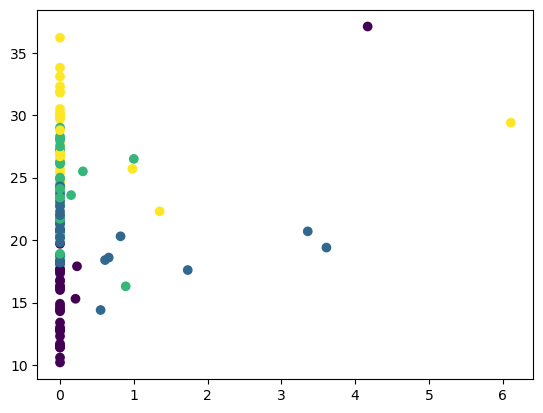

In [270]:
plt.scatter(cityData['Grand Total'], cityData['CSMOKING_CrudePrev'], c = cityData['Asthma Quartile'])

In [272]:
swm = pd.read_excel('SWM.xlsx')
swm = data[['Grand Total', 'TRACT']].merge(swm, how='left', left_on='TRACT', right_on='TRACTINT')
swm


/opt/anaconda3/lib/python3.12/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,Grand Total,TRACT,OBJECTID,TRACTINT,NID,WEIGHT
0,1.0000,10300,6696,10300,170200,0.035189
1,1.0000,10300,6697,10300,30500,0.030986
2,1.0000,10300,6698,10300,51100,0.025809
3,1.0000,10300,6699,10300,20100,0.020287
4,1.0000,10300,6700,10300,170600,0.019307
...,...,...,...,...,...,...
18161,0.9804,982200,12754,982200,560400,0.005937
18162,0.9804,982200,12755,982200,191500,0.005933
18163,0.9804,982200,12756,982200,260900,0.005927
18164,0.9804,982200,12757,982200,515401,0.005877


In [274]:
swm['WEIGHTED'] = swm['WEIGHT']*swm['Grand Total']
swm

,Grand Total,TRACT,OBJECTID,TRACTINT,NID,WEIGHT,WEIGHTED
0,1.0000,10300,6696,10300,170200,0.035189,0.035189
1,1.0000,10300,6697,10300,30500,0.030986,0.030986
2,1.0000,10300,6698,10300,51100,0.025809,0.025809
3,1.0000,10300,6699,10300,20100,0.020287,0.020287
4,1.0000,10300,6700,10300,170600,0.019307,0.019307
...,...,...,...,...,...,...,...
18161,0.9804,982200,12754,982200,560400,0.005937,0.005820
18162,0.9804,982200,12755,982200,191500,0.005933,0.005816
18163,0.9804,982200,12756,982200,260900,0.005927,0.005811
18164,0.9804,982200,12757,982200,515401,0.005877,0.005762


In [276]:
swm = swm[['NID','WEIGHTED']].groupby('NID').sum()
swm

,WEIGHTED
NID,
10300,0.176378
20100,0.219196
20300,0.233019
30500,0.216859
40200,0.214891
...,...
981000,0.241936
981100,0.130303
981200,0.235877


In [282]:
data = data.merge(swm, how = 'left', left_on = 'TRACT', right_on='NID')
data

,Geo_FIPS,TotalPopEst2015_19ACS_x,Age0to17PopEst2015_19ACS_x,AllPrimaryCarePatientsAge0to17,WellChildVisitsInPastYearAge0to17,AsthmaDiagnosisAge0to17,YearOfStartDate,UnderAge1PopEst2015_19ACS,Unique0to17WithED_Visit,NumberED_VisitsAge0to17,NumberLowAcuityED_VisitsAge0to17,NumberAsthmaRelatedED_Visits,NumberED_VisitsByChildrenUnder1YearOld,NumberOfInjuryRelatedVisits,NumberAcuteRespiratoryTractInfectionRelatedED_VisitsAge0to17,Total,Total!!Hispanic or Latino,Total!!Not Hispanic or Latino,Total!!Not Hispanic or Latino!!Population of one race,Total!!Not Hispanic or Latino!!Population of one race!!White alone,Total!!Not Hispanic or Latino!!Population of one race!!Black or African American alone,Total!!Not Hispanic or Latino!!Population of one race!!American Indian and Alaska Native alone,Total!!Not Hispanic or Latino!!Population of one race!!Asian alone,Total!!Not Hispanic or Latino!!Population of one race!!Native Hawaiian and Other Pacific Islander alone,Total!!Not Hispanic or Latino!!Population of one race!!Some Other Race alone,Total!!Not Hispanic or Latino!!Two or More Races,Occupied housing units!!Estimate!!Occupied housing units,"HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!Less than $5,000","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$5,000 to $9,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$10,000 to $14,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$15,000 to $19,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$20,000 to $24,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$25,000 to $34,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$35,000 to $49,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$50,000 to $74,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$75,000 to $99,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$100,000 to $149,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$150,000 or more",HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!Median household income (dollars),Population2010,ACCESS2_CrudePrev,BPHIGH_CrudePrev,BPMED_CrudePrev,CASTHMA_CrudePrev,CHD_CrudePrev,CHECKUP_CrudePrev,CHOLSCREEN_CrudePrev,COPD_CrudePrev,COREM_CrudePrev,CSMOKING_CrudePrev,DIABETES_CrudePrev,HIGHCHOL_CrudePrev,OBESITY_CrudePrev,"1,1,2-Trichloroethane","1,1,2,2-Tetrachloroethane","1,2-Ethanediol (Ethylene Glycol)","1,3-Butadiene","1,4-Dichlorobenzene","1,4-Dioxane (1,4-Diethyleneoxide)","2,2,4-Trimethylpentane",Acetaldehyde,Acrolein,...,Benzene,Benzyl Chloride,Cadmium,Carbon Disulfide,Carbon Tetrachloride,Chlorine,Chlorobenzene,Chloroethene (vinyl chloride),Chloroform,Chromium,Cobalt,Cresols/Cresylic Acid (Isomers And Mixture),Cumene,Cyanides,Dibutylphthalate,Diethanolamine,"Epichlorohydrin (1-Chloro-2,3-Epoxypropane)",Ethyl Chloride (Chloroethane),Ethylbenzene,"Ethylene Dichloride (1,2-Dichloroethane)",Ethylene Oxide,"Ethylidene Dichloride (1,1-Dichloroethane)",Formaldehyde,Glycol Ethers,Hexane,Hexavalent Chromium,Hydrochloric Acid,Hydrogen Fluoride (Hydrofluoric Acid),Isophorone,Lead,m-Xylene,Maleic Anhydride,Manganese,Mercury,Methanol,Methyl Chloride (Chloromethane),"Methyl Chloroform (1,1,1-Trichloroethane)",Methyl Isobutyl Ketone (4-Methyl-2-Pentanone),Methyl Methacrylate,Methylene Chloride (Dichloromethane),Naphthalene,Nickel,o-Xylene,Phenol,Phosphorus,Phthalic Anhydride,Polycyclic Organic Matter,Propionaldehyde,Propylene Dichloride,Propylene Oxide,Selenium,Styrene,Tetrachloroethylene (Perchloroethylene),Toluene,Trichloroethylene,"Vinylidene Chloride (1,1-Dichloroethylene)",Xylenes (Isomers And Mixture),Grand Total,TRACT,WEIGHTED_x,WEIGHTED_y,WEIGHTED
0,42003010300,4147.0,155.0,50.0,33.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [284]:
data['WEIGHTED'] = data['Grand Total'] + data['WEIGHTED']*20
data

,Geo_FIPS,TotalPopEst2015_19ACS_x,Age0to17PopEst2015_19ACS_x,AllPrimaryCarePatientsAge0to17,WellChildVisitsInPastYearAge0to17,AsthmaDiagnosisAge0to17,YearOfStartDate,UnderAge1PopEst2015_19ACS,Unique0to17WithED_Visit,NumberED_VisitsAge0to17,NumberLowAcuityED_VisitsAge0to17,NumberAsthmaRelatedED_Visits,NumberED_VisitsByChildrenUnder1YearOld,NumberOfInjuryRelatedVisits,NumberAcuteRespiratoryTractInfectionRelatedED_VisitsAge0to17,Total,Total!!Hispanic or Latino,Total!!Not Hispanic or Latino,Total!!Not Hispanic or Latino!!Population of one race,Total!!Not Hispanic or Latino!!Population of one race!!White alone,Total!!Not Hispanic or Latino!!Population of one race!!Black or African American alone,Total!!Not Hispanic or Latino!!Population of one race!!American Indian and Alaska Native alone,Total!!Not Hispanic or Latino!!Population of one race!!Asian alone,Total!!Not Hispanic or Latino!!Population of one race!!Native Hawaiian and Other Pacific Islander alone,Total!!Not Hispanic or Latino!!Population of one race!!Some Other Race alone,Total!!Not Hispanic or Latino!!Two or More Races,Occupied housing units!!Estimate!!Occupied housing units,"HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!Less than $5,000","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$5,000 to $9,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$10,000 to $14,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$15,000 to $19,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$20,000 to $24,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$25,000 to $34,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$35,000 to $49,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$50,000 to $74,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$75,000 to $99,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$100,000 to $149,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$150,000 or more",HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!Median household income (dollars),Population2010,ACCESS2_CrudePrev,BPHIGH_CrudePrev,BPMED_CrudePrev,CASTHMA_CrudePrev,CHD_CrudePrev,CHECKUP_CrudePrev,CHOLSCREEN_CrudePrev,COPD_CrudePrev,COREM_CrudePrev,CSMOKING_CrudePrev,DIABETES_CrudePrev,HIGHCHOL_CrudePrev,OBESITY_CrudePrev,"1,1,2-Trichloroethane","1,1,2,2-Tetrachloroethane","1,2-Ethanediol (Ethylene Glycol)","1,3-Butadiene","1,4-Dichlorobenzene","1,4-Dioxane (1,4-Diethyleneoxide)","2,2,4-Trimethylpentane",Acetaldehyde,Acrolein,...,Benzene,Benzyl Chloride,Cadmium,Carbon Disulfide,Carbon Tetrachloride,Chlorine,Chlorobenzene,Chloroethene (vinyl chloride),Chloroform,Chromium,Cobalt,Cresols/Cresylic Acid (Isomers And Mixture),Cumene,Cyanides,Dibutylphthalate,Diethanolamine,"Epichlorohydrin (1-Chloro-2,3-Epoxypropane)",Ethyl Chloride (Chloroethane),Ethylbenzene,"Ethylene Dichloride (1,2-Dichloroethane)",Ethylene Oxide,"Ethylidene Dichloride (1,1-Dichloroethane)",Formaldehyde,Glycol Ethers,Hexane,Hexavalent Chromium,Hydrochloric Acid,Hydrogen Fluoride (Hydrofluoric Acid),Isophorone,Lead,m-Xylene,Maleic Anhydride,Manganese,Mercury,Methanol,Methyl Chloride (Chloromethane),"Methyl Chloroform (1,1,1-Trichloroethane)",Methyl Isobutyl Ketone (4-Methyl-2-Pentanone),Methyl Methacrylate,Methylene Chloride (Dichloromethane),Naphthalene,Nickel,o-Xylene,Phenol,Phosphorus,Phthalic Anhydride,Polycyclic Organic Matter,Propionaldehyde,Propylene Dichloride,Propylene Oxide,Selenium,Styrene,Tetrachloroethylene (Perchloroethylene),Toluene,Trichloroethylene,"Vinylidene Chloride (1,1-Dichloroethylene)",Xylenes (Isomers And Mixture),Grand Total,TRACT,WEIGHTED_x,WEIGHTED_y,WEIGHTED
0,42003010300,4147.0,155.0,50.0,33.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [292]:
data['Geo_FIPS'] = data['Geo_FIPS'].astype(int)
cityData = cityData.merge(data[['Geo_FIPS', 'TRACT', 'WEIGHTED']], how = 'left', left_on = 'Geo_FIPS', right_on = 'Geo_FIPS')
cityData

,Geo_FIPS,TotalPopEst2015_19ACS_x,Age0to17PopEst2015_19ACS_x,AllPrimaryCarePatientsAge0to17,WellChildVisitsInPastYearAge0to17,AsthmaDiagnosisAge0to17,YearOfStartDate,UnderAge1PopEst2015_19ACS,Unique0to17WithED_Visit,NumberED_VisitsAge0to17,NumberLowAcuityED_VisitsAge0to17,NumberAsthmaRelatedED_Visits,NumberED_VisitsByChildrenUnder1YearOld,NumberOfInjuryRelatedVisits,NumberAcuteRespiratoryTractInfectionRelatedED_VisitsAge0to17,Total,Total!!Hispanic or Latino,Total!!Not Hispanic or Latino,Total!!Not Hispanic or Latino!!Population of one race,Total!!Not Hispanic or Latino!!Population of one race!!White alone,Total!!Not Hispanic or Latino!!Population of one race!!Black or African American alone,Total!!Not Hispanic or Latino!!Population of one race!!American Indian and Alaska Native alone,Total!!Not Hispanic or Latino!!Population of one race!!Asian alone,Total!!Not Hispanic or Latino!!Population of one race!!Native Hawaiian and Other Pacific Islander alone,Total!!Not Hispanic or Latino!!Population of one race!!Some Other Race alone,Total!!Not Hispanic or Latino!!Two or More Races,Occupied housing units!!Estimate!!Occupied housing units,"HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!Less than $5,000","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$5,000 to $9,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$10,000 to $14,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$15,000 to $19,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$20,000 to $24,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$25,000 to $34,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$35,000 to $49,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$50,000 to $74,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$75,000 to $99,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$100,000 to $149,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$150,000 or more",HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!Median household income (dollars),Population2010,ACCESS2_CrudePrev,BPHIGH_CrudePrev,BPMED_CrudePrev,CASTHMA_CrudePrev,CHD_CrudePrev,CHECKUP_CrudePrev,CHOLSCREEN_CrudePrev,COPD_CrudePrev,COREM_CrudePrev,CSMOKING_CrudePrev,DIABETES_CrudePrev,HIGHCHOL_CrudePrev,OBESITY_CrudePrev,"1,1,2-Trichloroethane","1,1,2,2-Tetrachloroethane","1,2-Ethanediol (Ethylene Glycol)","1,3-Butadiene","1,4-Dichlorobenzene","1,4-Dioxane (1,4-Diethyleneoxide)","2,2,4-Trimethylpentane",Acetaldehyde,Acrolein,...,Carbon Disulfide,Carbon Tetrachloride,Chlorine,Chlorobenzene,Chloroethene (vinyl chloride),Chloroform,Chromium,Cobalt,Cresols/Cresylic Acid (Isomers And Mixture),Cumene,Cyanides,Dibutylphthalate,Diethanolamine,"Epichlorohydrin (1-Chloro-2,3-Epoxypropane)",Ethyl Chloride (Chloroethane),Ethylbenzene,"Ethylene Dichloride (1,2-Dichloroethane)",Ethylene Oxide,"Ethylidene Dichloride (1,1-Dichloroethane)",Formaldehyde,Glycol Ethers,Hexane,Hexavalent Chromium,Hydrochloric Acid,Hydrogen Fluoride (Hydrofluoric Acid),Isophorone,Lead,m-Xylene,Maleic Anhydride,Manganese,Mercury,Methanol,Methyl Chloride (Chloromethane),"Methyl Chloroform (1,1,1-Trichloroethane)",Methyl Isobutyl Ketone (4-Methyl-2-Pentanone),Methyl Methacrylate,Methylene Chloride (Dichloromethane),Naphthalene,Nickel,o-Xylene,Phenol,Phosphorus,Phthalic Anhydride,Polycyclic Organic Matter,Propionaldehyde,Propylene Dichloride,Propylene Oxide,Selenium,Styrene,Tetrachloroethylene (Perchloroethylene),Toluene,Trichloroethylene,"Vinylidene Chloride (1,1-Dichloroethylene)",Xylenes (Isomers And Mixture),Grand Total,TRACT_x,WEIGHTED_x,Asthma Quartile,TRACT_y,WEIGHTED_y,TRACT,WEIGHTED
0,42003010300,4147.0,155.0,50.0,33.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

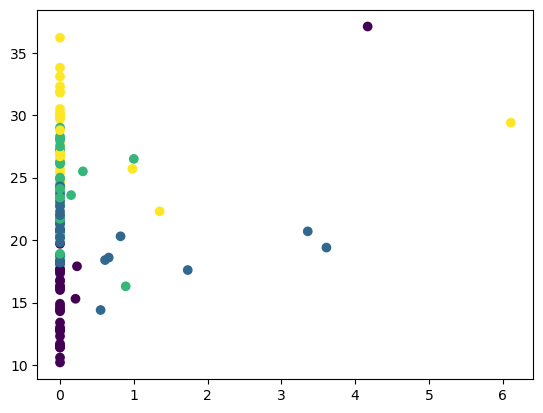

In [294]:
plt.scatter(cityData['Grand Total'], cityData['CSMOKING_CrudePrev'], c = cityData['Asthma Quartile'])

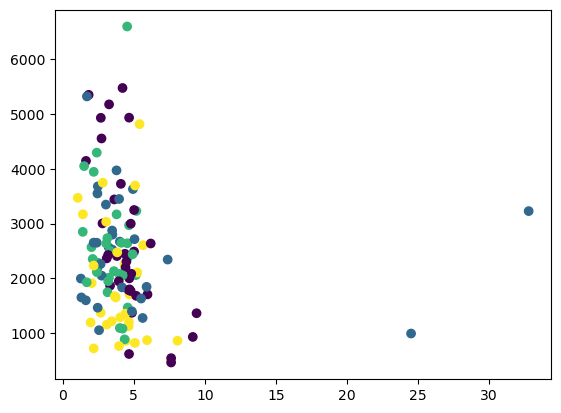

In [296]:
plt.scatter(cityData['WEIGHTED'], cityData['Total'], c = cityData['Asthma Quartile'])